In [1]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('KDDTrain+.txt')

In [2]:
data.shape

(125972, 43)

In [3]:
# Remove Difficulty Level
data = data.drop('20', axis = 1)

In [4]:
# Separate source and target variables
X = data.iloc[:,:-1]
y = data[data.columns[len(data.columns)-1]]

In [5]:
X = X.to_numpy()
y = y.to_numpy()

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# Remove Categorical Features
X_no_cat = np.delete(X,[1,2,3],1)

In [7]:
# Assign each attack type to a numerical representation of an attack category

for i in range(X_no_cat.shape[0]):
  
    if(y[i]=='normal'):
        y[i] = 1
    
# dos
    if(y[i]=='neptune'or y[i]=='smurf'or y[i]=='pod' or y[i]=='teardrop' or y[i]=='land' or y[i]=='back'):
        y[i] = 2

# u2r
    if(y[i]=='buffer_overflow' or y[i]=='loadmodule' or y[i]=='perl' or y[i]=='rootkit'):
        y[i] = 3
    
# r2l 
    if(y[i]=='guess_passwd' or y[i]=='ftp_write' or y[i]=='imap' or y[i]=='phf' or y[i]=='multihop' or y[i]=='warezmaster' or y[i]=='warezclient' or y[i]=='spy'):
        y[i] = 4

# probe
    if(y[i]=='portsweep' or y[i]=='ipsweep' or y[i]=='nmap' or y[i]=='satan'):
        y[i] = 5

In [8]:
y = np.int64(y)
print(set(y))
print(type(y))

{1, 2, 3, 4, 5}
<class 'numpy.ndarray'>


In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_no_cat, y, test_size=0.33, random_state=42, stratify = y)

In [10]:
print(set(y))
print(set(y_train))
print(set(y_test))

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 3, 4, 5}


In [11]:
print(y.shape)
print(X.shape)
print('\n')
print(y_train.shape)
print(X_train.shape)
print('\n')
print(X_test.shape)
print(y_test.shape)

(125972,)
(125972, 41)


(62141,)
(62141, 38)


(51130, 38)
(51130,)


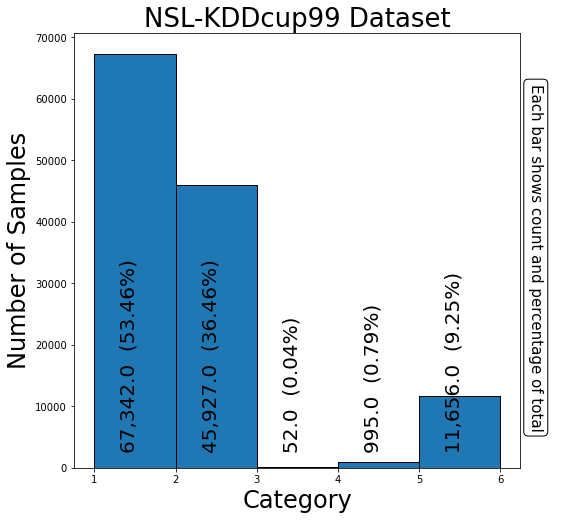

In [28]:
categories = y

from matplotlib.patches import Rectangle

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(8,8))

counts, bins, patches = ax.hist(categories, bins= [1,2,3,4,5,6], edgecolor='black')

# Set the graph title and axes titles
plt.title('NSL-KDDcup99 Dataset', fontsize=26)
plt.ylabel('Number of Samples', fontsize=24)
plt.xlabel('Category', fontsize=24)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=20)

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.95,.17), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=15, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

# Display the graph
plt.show()

Text(0, 0.5, 'Number of Samples')

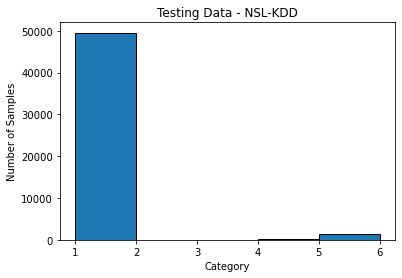

In [13]:
categories2 = y_test
bins = [1,2,3,4,5,6]
plt.hist(categories2, bins = bins, edgecolor = 'black')
plt.title('Testing Data - NSL-KDD')
plt.xlabel('Category')
plt.ylabel('Number of Samples')

Text(0, 0.5, 'Number of Samples')

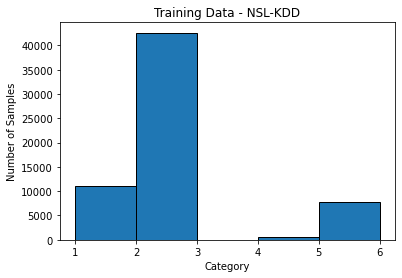

In [14]:
categories3 = y_train
bins = [1,2,3,4,5,6]
plt.hist(categories3, bins = bins, edgecolor = 'black')
plt.title('Training Data - NSL-KDD')
plt.xlabel('Category')
plt.ylabel('Number of Samples')